### Загружаем библиотеки

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Пишем класс бинарного класификатора

In [1]:
class Perceptron(object):
    
    def __init__(self, eta = 0.1 , n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def net_input(self, X):
        return np.dot(X , self.w_[1:]) +self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0 , 1 , -1)
    
    def fit(self, X , y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

### Загружаем данные. Для примера - датасет ирис

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url , header = None)

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Для лучшей визуализации выберем только 2 признака: длину чащелистника и его ширину. Так же выберем только 2 вида ирисов из 3ех.
Преобразуем столбец вида в бинарную (-1, 1) переменную

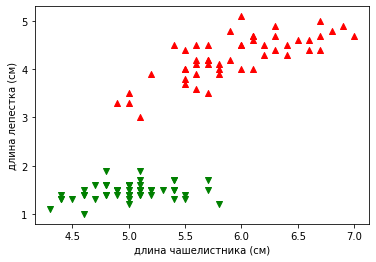

In [17]:
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa' , -1 , 1)

X = data.iloc[0:100, [0 , 2]].values

plt.scatter(X[:50 , 0] , X[:50 , 1] , color = 'green' , marker = 'v')
plt.scatter(X[50:100, 0] , X[50:100 , 1 ] , color = "red" , marker = '^')
plt.ylabel('длина лепестка (см)')
plt.xlabel("длина чашелистника (см)")
plt.show()

 Классы хорошо линейно разделимы.

### Создаем обьект нашего класса и обучаем на выборке

In [7]:
ppn = Perceptron()
ppn.fit(X, y)

### Построим график ошибок

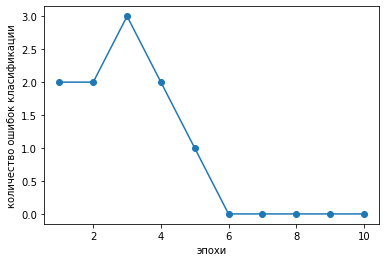

In [18]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.ylabel('количество ошибок класификации')
plt.xlabel("эпохи")
plt.show()

Начиная с 6-ой эпохи модель обучилась и разделила выборку на 2 части.

### Создадим функцию которая рисует график и закрашивает области в соотвествии с обученной моделью

In [9]:
def plot_decision_regions(X, y ,classifier, resolution = 0.02):
    
    markers = ('v' , '^')
    colors = ('green' , 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min , x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution) ,np.arange(x2_min, x2_max, resolution))
    
    Z =classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0] , y = X[y == cl, 1],
            alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)

### Продемонстируем работу функции на наших данных

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


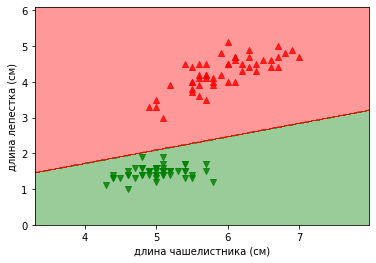

In [19]:
plot_decision_regions(X, y, classifier = ppn)
plt.ylabel('длина лепестка (см)')
plt.xlabel("длина чашелистника (см)")
plt.show()